# Solving the Traveling Salesman  Problem using Local Search

Points: 10

## The [Traveling Salesman Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem)

* __Goal:__ Find the shortest tour visiting each of $n$ cities exactly once and returning back to the starting city. Given are pairwise distances between cities, where $d_{i,j}$ is the distance from city $i$ to city $j$.

* __State space:__ Each state represents a tour. The cities are numbered and a tour can be expressed as vector  $\pi$ with the order in which the cities are visited (a [permutation](https://en.wikipedia.org/wiki/Permutation)). That is, $\pi(1)$ is the index of the first city to visit, $\pi(2)$ the index of the second, and so on.

* __Objective function:__ Minimize the tour length. The optimization problem is to find the optimal tour $\pi^*$ through the $n$ cities and returning to the starting city:

  > minimize: $\mathrm{tourlength}(\pi) = d_{\pi(n),\pi(1)} + \sum_{i = 1}^{n-1} d_{\pi(i),\pi(i+1)}$
  >
  > subject to: $\pi \ \text{is a valid permutation vector}$

* __Local moves:__ Exchange two cities in the order.

## Helper functions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

np.set_printoptions(precision=2)
pd.set_option('display.precision', 2)

# make the results repeatable
np.random.seed(1234)

In [ ]:
def random_tour(n):
    """Create a random tour"""

    tour = list(range(n))
    random.shuffle(tour)
    return(tour)

random_tour(10)

[6, 9, 5, 1, 3, 2, 7, 4, 0, 8]

In [ ]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

def random_tsp(n):
    """
    Create a random (Euclidean) traveling salesman problem. Choose n points randomly in a 1 x 1 unit square and calulates a
    pairwise Euclidean distance matrix.
    """

    pos = pd.DataFrame({
        "x" : np.random.uniform(size = n),
        "y" : np.random.uniform(size = n)
    })

    dist = squareform(pdist(pos))

    return({"pos": pos, "dist": dist})

tsp = random_tsp(10)

print(f"Positions:\n{tsp['pos']}")
print(f"Distance matrix:\n{pd.DataFrame(tsp['dist'])})")

Positions:
      x     y
0  0.19  0.36
1  0.62  0.50
2  0.44  0.68
3  0.79  0.71
4  0.78  0.37
5  0.27  0.56
6  0.28  0.50
7  0.80  0.01
8  0.96  0.77
9  0.88  0.88
Distance matrix:
      0     1     2     3     4     5     6     7     8     9
0  0.00  0.45  0.41  0.69  0.59  0.22  0.17  0.70  0.87  0.86
1  0.45  0.00  0.26  0.27  0.20  0.35  0.35  0.52  0.43  0.46
2  0.41  0.26  0.00  0.35  0.46  0.21  0.24  0.76  0.53  0.48
3  0.69  0.27  0.35  0.00  0.34  0.53  0.55  0.70  0.18  0.19
4  0.59  0.20  0.46  0.34  0.00  0.54  0.52  0.36  0.44  0.52
5  0.22  0.35  0.21  0.53  0.54  0.00  0.06  0.76  0.72  0.68
6  0.17  0.35  0.24  0.55  0.52  0.06  0.00  0.72  0.73  0.71
7  0.70  0.52  0.76  0.70  0.36  0.76  0.72  0.00  0.77  0.87
8  0.87  0.43  0.53  0.18  0.44  0.72  0.73  0.77  0.00  0.14
9  0.86  0.46  0.48  0.19  0.52  0.68  0.71  0.87  0.14  0.00)


In [ ]:
def tour_length(tsp, tour):
    """Caclulate the length of a tour, i.e., the objective function."""

    # make sure tour is a Python list (not an array or a numpy.array)
    if not isinstance(tour, list): tour = tour.tolist()

    tl = 0
    dist = tsp["dist"]

    for i in range(len(tour)-1):
        tl += dist[tour[i], tour[i+1]]

    tl += dist[tour[-1], tour[0]]

    return(tl)

tour = random_tour(10)
tour_length(tsp, tour)

np.float64(5.159234156237758)

Tour length: 5.16


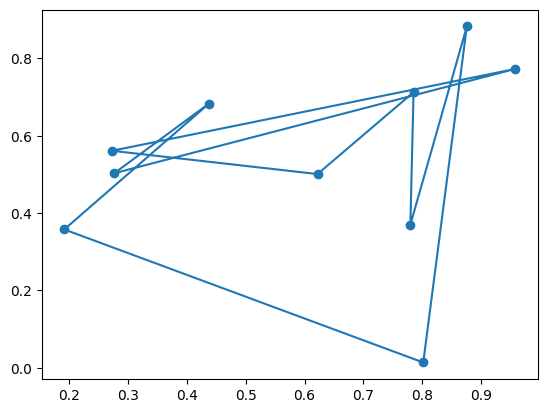

In [ ]:
def show_tsp(tsp, tour = None):
    """display the traveling salesman problem and a tour."""

    pos = tsp["pos"]

    plt.scatter(pos["x"], pos["y"])

    if tour is not None:
        # make sure tour is a Python list (not an array or a numpy.array)
        if not isinstance(tour, list): tour = tour.tolist()

        print(f"Tour length: {round(tour_length(tsp, tour), 2)}")

        pos_ = pos.reindex(tour)
        pos_ = pd.concat([pos_, pos_.head(1)])
        plt.plot(pos_["x"], pos_["y"])

    plt.show()

show_tsp(tsp, tour)

## Use R to find a solution

Load rpy2, make sure the R [TSP package](https://CRAN.R-project.org/package=TSP) is installed and prepare the distance matrix.

In [ ]:
%load_ext rpy2.ipython

%R if(!"TSP" %in% rownames(installed.packages())) install.packages("TSP", repos="http://cran.us.r-project.org")
%R if(!"microbenchmark" %in% rownames(installed.packages())) install.packages("microbenchmark", repos="http://cran.us.r-project.org")

d = tsp["dist"]

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘iterators’, ‘foreach’

trying URL 'http://cran.us.r-project.org/src/contrib/iterators_1.0.14.tar.gz'
trying URL 'http://cran.us.r-project.org/src/contrib/foreach_1.5.2.tar.gz'
trying URL 'http://cran.us.r-project.org/src/contrib/TSP_1.2-5.tar.gz'

The downloaded source packages are in
	‘/tmp/RtmpFmYqVX/downloaded_packages’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'http://cran.us.r-project.org/src/contrib/microbenchmark_1.5.0.tar.gz'
Content type 'application/x-gzip' length 61673 bytes (60 KB)
downloaded 60 KB


The downloaded source packages are in
	‘/tmp/RtmpFmYqVX/downloaded_packages’


Solve the TSP using [`solve_TSP`](https://www.rdocumentation.org/packages/TSP/versions/1.1-10/topics/solve_TSP) with the default heuristic. Note that 2-opt is steepest ascend hill climbing with exchanging two cities. `rep=100` means 100 random restarts.

In [ ]:
%%R -i d -o tour

library("TSP")

tsp <- TSP(d)
print(tsp)

tour <- solve_TSP(tsp, rep = 100)
print(tour)

# R starts index with 1, but Python starts at 0
tour <- tour - 1L

object of class ‘TSP’ 
10 cities (distance ‘unknown’) 
object of class ‘TOUR’ 
result of method ‘arbitrary_insertion+two_opt_rep_100’ for 10 cities
tour length: 2.763574 


In addition: Warning message:
executing %dopar% sequentially: no parallel backend registered 


Tour length: 2.76


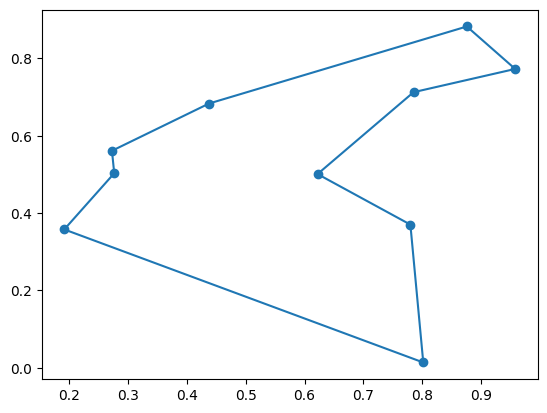

In [ ]:
show_tsp(tsp, tour)

How long does it take to solve the problem 100 times?

In [ ]:
%%R -i d

library("microbenchmark")

microbenchmark(tsp <- TSP(d))

Unit: microseconds
          expr     min      lq     mean  median     uq      max neval
 tsp <- TSP(d) 323.197 357.957 395.4164 373.948 392.88 1059.371   100


## Steepest-ascend Hill Climbing Search [3 Points]

Calculate the objective function for all local moves (move each queen within its column) and always choose the best among all local moves.

In [ ]:
import numpy as np
import random

def random_state(n):
    """Sinh trạng thái ngẫu nhiên cho bài toán n-queens"""
    return [random.randint(0, n-1) for _ in range(n)]

def compute_conflicts(state):
    """Tính số cặp hậu tấn công nhau"""
    n = len(state)
    conflicts = 0
    for i in range(n):
        for j in range(i+1, n):
            # cùng hàng hoặc cùng đường chéo
            if state[i] == state[j] or abs(state[i] - state[j]) == abs(i - j):
                conflicts += 1
    return conflicts

def get_neighbors(state):
    """Sinh tất cả trạng thái hàng xóm: di chuyển từng hậu trong cột của nó"""
    n = len(state)
    neighbors = []
    for col in range(n):
        for row in range(n):
            if row != state[col]:
                new_state = state.copy()
                new_state[col] = row
                neighbors.append(new_state)
    return neighbors

def steepest_ascent_hill_climbing(n, max_steps=1000):
    """Thuật toán leo đồi dốc nhất cho bài toán N-Queens"""
    current = random_state(n)
    current_conflicts = compute_conflicts(current)

    for step in range(max_steps):
        neighbors = get_neighbors(current)
        # Tính giá trị hàm mục tiêu (số xung đột)
        neighbor_conflicts = [compute_conflicts(nb) for nb in neighbors]
        best = min(neighbor_conflicts)
        best_neighbor = neighbors[neighbor_conflicts.index(best)]

        if best >= current_conflicts:
            # Không có cải thiện → đạt cực trị cục bộ
            print(f"Dừng tại bước {step}, xung đột = {current_conflicts}")
            break
        else:
            current, current_conflicts = best_neighbor, best

    return current, current_conflicts


solution, conflicts = steepest_ascent_hill_climbing(8)
print("Kết quả:", solution)
print("Số xung đột:", conflicts)


Dừng tại bước 2, xung đột = 1
Kết quả: [3, 5, 6, 2, 0, 7, 1, 4]
Số xung đột: 1


## Steepest-ascend Hill Climbing Search with Random Restarts [1 Point]

Steepest-ascend with random restarts.

In [ ]:
import numpy as np
import random

def random_state(n):
    """Sinh trạng thái ngẫu nhiên cho bài toán n-queens"""
    return [random.randint(0, n-1) for _ in range(n)]

def compute_conflicts(state):
    """Tính số cặp hậu tấn công nhau"""
    n = len(state)
    conflicts = 0
    for i in range(n):
        for j in range(i+1, n):
            # cùng hàng hoặc cùng đường chéo
            if state[i] == state[j] or abs(state[i] - state[j]) == abs(i - j):
                conflicts += 1
    return conflicts

def get_neighbors(state):
    """Sinh tất cả trạng thái hàng xóm: di chuyển từng hậu trong cột của nó"""
    n = len(state)
    neighbors = []
    for col in range(n):
        for row in range(n):
            if row != state[col]:
                new_state = state.copy()
                new_state[col] = row
                neighbors.append(new_state)
    return neighbors

def steepest_ascent_hill_climbing(n, max_steps=1000):
    """Thuật toán leo đồi dốc nhất"""
    current = random_state(n)
    current_conflicts = compute_conflicts(current)

    for step in range(max_steps):
        neighbors = get_neighbors(current)
        neighbor_conflicts = [compute_conflicts(nb) for nb in neighbors]
        best = min(neighbor_conflicts)
        best_neighbor = neighbors[neighbor_conflicts.index(best)]

        if best >= current_conflicts:
            break  # đạt cực trị cục bộ
        else:
            current, current_conflicts = best_neighbor, best

    return current, current_conflicts

def steepest_ascent_random_restart(n, restarts=50, max_steps=1000):
    """Leo đồi dốc nhất với random restarts"""
    best_state = None
    best_conflicts = float('inf')

    for r in range(restarts):
        state, conflicts = steepest_ascent_hill_climbing(n, max_steps)
        print(f"Restart {r+1}: {conflicts} conflicts")

        if conflicts < best_conflicts:
            best_state, best_conflicts = state, conflicts

        if best_conflicts == 0:
            print(f" Giải pháp hoàn hảo đạt được ở lần restart {r+1}")
            break

    return best_state, best_conflicts


solution, conflicts = steepest_ascent_random_restart(n=8, restarts=20)
print("Kết quả cuối cùng:", solution)
print("Số xung đột:", conflicts)


Restart 1: 1 conflicts
Restart 2: 2 conflicts
Restart 3: 1 conflicts
Restart 4: 2 conflicts
Restart 5: 2 conflicts
Restart 6: 1 conflicts
Restart 7: 2 conflicts
Restart 8: 0 conflicts
 Giải pháp hoàn hảo đạt được ở lần restart 8
Kết quả cuối cùng: [5, 2, 4, 7, 0, 3, 1, 6]
Số xung đột: 0


## Stochastic Hill Climbing [1 Points]

Chooses randomly from among all uphill moves.

In [ ]:
import random

def random_state(n):
    """Sinh trạng thái ngẫu nhiên cho bài toán n-queens"""
    return [random.randint(0, n-1) for _ in range(n)]

def compute_conflicts(state):
    """Tính số cặp hậu tấn công nhau"""
    n = len(state)
    conflicts = 0
    for i in range(n):
        for j in range(i+1, n):
            if state[i] == state[j] or abs(state[i] - state[j]) == abs(i - j):
                conflicts += 1
    return conflicts

def get_neighbors(state):
    """Sinh tất cả trạng thái hàng xóm: di chuyển từng hậu trong cột của nó"""
    n = len(state)
    neighbors = []
    for col in range(n):
        for row in range(n):
            if row != state[col]:
                new_state = state.copy()
                new_state[col] = row
                neighbors.append(new_state)
    return neighbors

def stochastic_hill_climbing(n, max_steps=1000):
    """Stochastic Hill Climbing cho bài toán N-Queens"""
    current = random_state(n)
    current_conflicts = compute_conflicts(current)

    for step in range(max_steps):
        neighbors = get_neighbors(current)

        # Tính số xung đột cho tất cả hàng xóm
        neighbor_conflicts = [compute_conflicts(nb) for nb in neighbors]

        # Chọn những neighbor tốt hơn (uphill moves)
        better_neighbors = [nb for nb, c in zip(neighbors, neighbor_conflicts) if c < current_conflicts]

        if not better_neighbors:
            print(f"Dừng tại bước {step}, xung đột = {current_conflicts}")
            break

        # Chọn ngẫu nhiên 1 trong các bước tốt hơn
        next_state = random.choice(better_neighbors)
        current = next_state
        current_conflicts = compute_conflicts(current)

    return current, current_conflicts


solution, conflicts = stochastic_hill_climbing(n=8, max_steps=1000)
print("Kết quả:", solution)
print("Số xung đột:", conflicts)


Dừng tại bước 7, xung đột = 2
Kết quả: [6, 0, 3, 7, 4, 2, 5, 1]
Số xung đột: 2


## First-choice Hill Climbing [1 Point]

First-choice hill climbing is a type of stochastic hill climbing that generates one random local neighbor at a time and accept it if it has a better objective function value than the current state.

In [ ]:
import random

def random_state(n):
    """Sinh trạng thái ngẫu nhiên cho bài toán n-queens"""
    return [random.randint(0, n-1) for _ in range(n)]

def compute_conflicts(state):
    """Tính số cặp hậu tấn công nhau"""
    n = len(state)
    conflicts = 0
    for i in range(n):
        for j in range(i+1, n):
            if state[i] == state[j] or abs(state[i] - state[j]) == abs(i - j):
                conflicts += 1
    return conflicts

def random_neighbor(state):
    """Sinh ngẫu nhiên 1 hàng xóm bằng cách di chuyển 1 hậu"""
    n = len(state)
    col = random.randint(0, n-1)
    row_choices = list(range(n))
    row_choices.remove(state[col])
    new_row = random.choice(row_choices)

    new_state = state.copy()
    new_state[col] = new_row
    return new_state

def first_choice_hill_climbing(n, max_steps=10000):
    """First-Choice Hill Climbing cho bài toán N-Queens"""
    current = random_state(n)
    current_conflicts = compute_conflicts(current)

    for step in range(max_steps):
        if current_conflicts == 0:
            print(f" Tìm thấy lời giải tại bước {step}")
            break

        neighbor = random_neighbor(current)
        neighbor_conflicts = compute_conflicts(neighbor)

        # Nếu neighbor tốt hơn, chấp nhận ngay
        if neighbor_conflicts < current_conflicts:
            current, current_conflicts = neighbor, neighbor_conflicts

    print(f"Dừng tại bước {step}, xung đột = {current_conflicts}")
    return current, current_conflicts


solution, conflicts = first_choice_hill_climbing(n=8, max_steps=5000)
print("Kết quả:", solution)
print("Số xung đột:", conflicts)


Dừng tại bước 4999, xung đột = 1
Kết quả: [6, 3, 0, 7, 5, 2, 5, 1]
Số xung đột: 1


## Simulated Annealing [2 Points]

In [ ]:
import random
import math

def random_state(n):
    """Sinh trạng thái ngẫu nhiên"""
    return [random.randint(0, n-1) for _ in range(n)]

def compute_conflicts(state):
    """Đếm số cặp hậu tấn công nhau"""
    n = len(state)
    conflicts = 0
    for i in range(n):
        for j in range(i + 1, n):
            if state[i] == state[j] or abs(state[i] - state[j]) == abs(i - j):
                conflicts += 1
    return conflicts

def random_neighbor(state):
    """Sinh một hàng xóm ngẫu nhiên"""
    n = len(state)
    new_state = state.copy()
    col = random.randint(0, n-1)
    new_row = random.randint(0, n-1)
    new_state[col] = new_row
    return new_state

def simulated_annealing(n, initial_temp=100, cooling_rate=0.99, min_temp=0.001, max_steps=100000):
    """Simulated Annealing cho N-Queens"""
    current = random_state(n)
    current_conflicts = compute_conflicts(current)
    best = current
    best_conflicts = current_conflicts
    T = initial_temp

    for step in range(max_steps):
        if current_conflicts == 0:
            print(f" Tìm thấy lời giải tại bước {step}")
            break

        neighbor = random_neighbor(current)
        neighbor_conflicts = compute_conflicts(neighbor)

        delta_e = neighbor_conflicts - current_conflicts

        # Nếu tốt hơn thì nhận, nếu tệ hơn thì có xác suất vẫn nhận
        if delta_e < 0 or random.random() < math.exp(-delta_e / T):
            current = neighbor
            current_conflicts = neighbor_conflicts

        # Cập nhật best
        if current_conflicts < best_conflicts:
            best = current
            best_conflicts = current_conflicts

        # Giảm nhiệt độ
        T = max(T * cooling_rate, min_temp)

    print(f"Dừng tại bước {step}, xung đột = {best_conflicts}")
    return best, best_conflicts


solution, conflicts = simulated_annealing(n=8)
print("Kết quả:", solution)
print("Số xung đột:", conflicts)


 Tìm thấy lời giải tại bước 741
Dừng tại bước 741, xung đột = 0
Kết quả: [6, 3, 1, 4, 7, 0, 2, 5]
Số xung đột: 0


## Compare Performance [2 Points]

Use runtime, scalability (number of cities), and best objective function value to compare the algorithms on boards of different sizes.  

For timing you can use the `time` package.

In [ ]:
import time

t0 = time.time()
print("Do something")
t1 = time.time()

print(f"This took: {(t1-t0) * 1e3} milliseconds")

Do something
This took: 0.12874603271484375 milliseconds



 Testing with 10 cities
Steepest Hill Climb            | Length:     2.91 | Time:     1.28 ms
Steepest + Random Restart      | Length:     2.86 | Time:    10.77 ms
Stochastic Hill Climb          | Length:     3.18 | Time:     7.89 ms
First-Choice Hill Climb        | Length:     2.86 | Time:     6.50 ms
Simulated Annealing            | Length:     2.86 | Time:    18.70 ms

 Testing with 20 cities
Steepest Hill Climb            | Length:     4.42 | Time:    28.88 ms
Steepest + Random Restart      | Length:     3.88 | Time:   196.65 ms
Stochastic Hill Climb          | Length:     5.17 | Time:     9.11 ms
First-Choice Hill Climb        | Length:     5.22 | Time:    15.67 ms
Simulated Annealing            | Length:     4.01 | Time:    53.44 ms

 Testing with 30 cities
Steepest Hill Climb            | Length:     6.38 | Time:   251.52 ms
Steepest + Random Restart      | Length:     5.22 | Time:  1890.93 ms
Stochastic Hill Climb          | Length:     6.37 | Time:    21.80 ms
First-Choice Hi

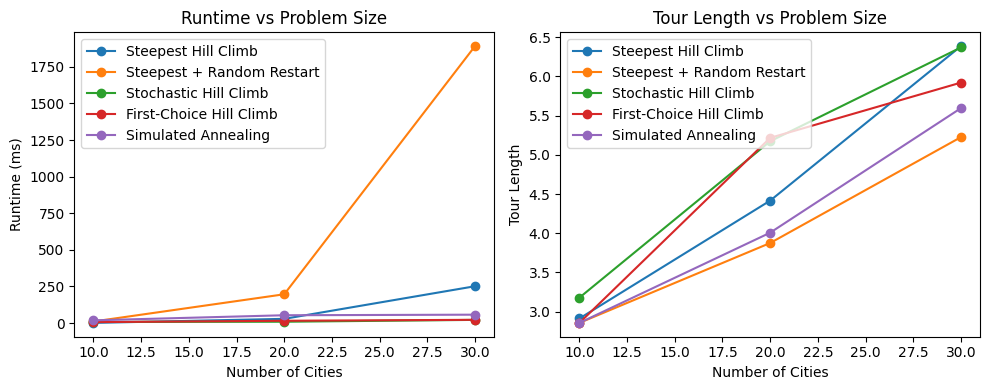

In [ ]:
import numpy as np
import random, math, time
import matplotlib.pyplot as plt
import pandas as pd

# ======================================================
#  Hàm khởi tạo TSP ngẫu nhiên
# ======================================================
def random_tsp(n):
    """Tạo bài toán TSP ngẫu nhiên"""
    coords = np.random.rand(n, 2)
    dist = np.sqrt(((coords[:, np.newaxis, :] - coords[np.newaxis, :, :]) ** 2).sum(axis=2))
    return {"coords": coords, "dist": dist}

def tour_length(tsp, tour):
    d = tsp["dist"]
    return sum(d[tour[i], tour[(i+1) % len(tour)]] for i in range(len(tour)))

def random_tour(n):
    tour = list(range(n))
    random.shuffle(tour)
    return tour

def random_neighbor(tour):
    a, b = random.sample(range(len(tour)), 2)
    new_tour = tour.copy()
    new_tour[a], new_tour[b] = new_tour[b], new_tour[a]
    return new_tour

# ======================================================
#  Thuật toán Hill Climbing
# ======================================================

# (1) Steepest-Ascent Hill Climb
def steepest_hill_climb(tsp):
    current = random_tour(len(tsp["dist"]))
    current_value = tour_length(tsp, current)
    improved = True

    while improved:
        improved = False
        best = current
        best_value = current_value
        for i in range(len(current)):
            for j in range(i+1, len(current)):
                neighbor = current.copy()
                neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
                value = tour_length(tsp, neighbor)
                if value < best_value:
                    best, best_value = neighbor, value
                    improved = True
        current, current_value = best, best_value
    return current, current_value

# (2) Steepest + Random Restart
def steepest_hill_climb_random_restart(tsp, restarts=10):
    best_tour, best_value = None, float("inf")
    for _ in range(restarts):
        tour, value = steepest_hill_climb(tsp)
        if value < best_value:
            best_tour, best_value = tour, value
    return best_tour, best_value

# (3) Stochastic Hill Climb
def stochastic_hill_climb(tsp, iterations=1000):
    current = random_tour(len(tsp["dist"]))
    current_value = tour_length(tsp, current)
    for _ in range(iterations):
        neighbor = random_neighbor(current)
        value = tour_length(tsp, neighbor)
        if value < current_value:
            current, current_value = neighbor, value
    return current, current_value

# (4) First-Choice Hill Climb
def first_choice_hill_climb(tsp, iterations=1000):
    current = random_tour(len(tsp["dist"]))
    current_value = tour_length(tsp, current)
    for _ in range(iterations):
        neighbor = random_neighbor(current)
        value = tour_length(tsp, neighbor)
        if value < current_value:
            current, current_value = neighbor, value
    return current, current_value

# (5) Simulated Annealing
def simulated_annealing(tsp, T=1000, cooling=0.995):
    current = random_tour(len(tsp["dist"]))
    current_value = tour_length(tsp, current)
    best, best_value = current, current_value

    while T > 1e-3:
        neighbor = random_neighbor(current)
        value = tour_length(tsp, neighbor)
        if value < current_value or math.exp((current_value - value) / T) > random.random():
            current, current_value = neighbor, value
            if value < best_value:
                best, best_value = neighbor, value
        T *= cooling
    return best, best_value


# ======================================================
#  So sánh hiệu năng
# ======================================================
results = []

for n in [10, 20, 30]:
    print(f"\n Testing with {n} cities")
    tsp = random_tsp(n)

    algorithms = [
        ("Steepest Hill Climb", steepest_hill_climb),
        ("Steepest + Random Restart", steepest_hill_climb_random_restart),
        ("Stochastic Hill Climb", stochastic_hill_climb),
        ("First-Choice Hill Climb", first_choice_hill_climb),
        ("Simulated Annealing", simulated_annealing)
    ]

    for name, algo in algorithms:
        t0 = time.time()
        tour, length = algo(tsp)
        t1 = time.time()
        runtime = (t1 - t0) * 1e3  # milliseconds
        results.append([name, n, length, runtime])
        print(f"{name:<30s} | Length: {length:8.2f} | Time: {runtime:8.2f} ms")

# ======================================================
#  Tổng hợp kết quả
# ======================================================
df_results = pd.DataFrame(results, columns=["Algorithm", "Problem Size", "Best Length", "Runtime (ms)"])
print("\n Summary:")
print(df_results)

# ======================================================
#  Vẽ biểu đồ
# ======================================================
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
for algo in df_results["Algorithm"].unique():
    sub = df_results[df_results["Algorithm"] == algo]
    plt.plot(sub["Problem Size"], sub["Runtime (ms)"], marker="o", label=algo)
plt.title("Runtime vs Problem Size")
plt.xlabel("Number of Cities")
plt.ylabel("Runtime (ms)")
plt.legend()

plt.subplot(1,2,2)
for algo in df_results["Algorithm"].unique():
    sub = df_results[df_results["Algorithm"] == algo]
    plt.plot(sub["Problem Size"], sub["Best Length"], marker="o", label=algo)
plt.title("Tour Length vs Problem Size")
plt.xlabel("Number of Cities")
plt.ylabel("Tour Length")
plt.legend()
plt.tight_layout()
plt.show()


## Bonus: Genetic Algorithm [+1 Point]

In [ ]:
# (6) Genetic Algorithm
def genetic_algorithm(tsp, population_size=100, generations=500, mutation_rate=0.02):
    n = len(tsp["dist"])

    # --- Tạo quần thể ngẫu nhiên ---
    population = [random_tour(n) for _ in range(population_size)]

    def fitness(tour):
        # Fitness càng cao thì tour càng tốt (ngắn hơn)
        return 1.0 / tour_length(tsp, tour)

    def selection(pop):
        # Chọn 2 cá thể tốt nhất trong số 5 ngẫu nhiên (tournament selection)
        tournament = random.sample(pop, 5)
        tournament.sort(key=lambda t: fitness(t), reverse=True)
        return tournament[0], tournament[1]

    def crossover(parent1, parent2):
        # Lai ghép theo phương pháp Order Crossover (OX)
        start, end = sorted(random.sample(range(n), 2))
        child = [None] * n
        child[start:end] = parent1[start:end]
        fill = [gene for gene in parent2 if gene not in child]
        idx = 0
        for i in range(n):
            if child[i] is None:
                child[i] = fill[idx]
                idx += 1
        return child

    def mutate(tour):
        if random.random() < mutation_rate:
            a, b = random.sample(range(n), 2)
            tour[a], tour[b] = tour[b], tour[a]
        return tour

    # --- Tiến hóa qua nhiều thế hệ ---
    for _ in range(generations):
        new_population = []
        for _ in range(population_size):
            p1, p2 = selection(population)
            child = crossover(p1, p2)
            child = mutate(child)
            new_population.append(child)
        population = new_population

    # --- Lấy cá thể tốt nhất ---
    best = min(population, key=lambda t: tour_length(tsp, t))
    return best, tour_length(tsp, best)
